<a href="https://colab.research.google.com/github/brianrebollarjuarez1/Ejercicios-Simulacion-I-7MM1/blob/main/Transformada_Inversa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metodo de la Transformada Inversa

Es un metodo de generacion de distribuciones de probabilidad, consistente en generar la distribucion objetivo a traves de la inversa generalizada de su funcion acumulativa, utilizando el siguiente lema:

Lema: Si $U \thicksim U(0,1)$, entonces la variable aleatoria $F^{-1}(U)$ tiene distribucion $F$.


Para este metodo utilizaremos la funcion:

$f(x) = \frac{e^x}{e-1}$ con $0 \leq x \leq 1$

Siguiendo el siguiente pseudocodigo:

- Generar $u \thicksim U(0,1)$
- Hacer $x = F^{-1}(U)$
- Salir $x$

Primero comprobamos que es una funcion de distribucion de probabilidad, para esto verificamos dos condiciones: 

- $f(x) \geq 0$ $\forall$ $x \in [0,1]$

- $\int _0 ^1 f(x) dx = 1$

Comprobamos las condiciones:

- $f(x) \geq 0$ ya que $e^x \geq 0$ $\forall$ $x \in [0,1]$, ademas $\frac{1}{e-1} > 0$

- $\int _0 ^1 (\frac{e^x}{e-1}) dx = \frac{1}{e-1} \int _0 ^1 e^x dx = \frac{1}{e-1} (e-1) = 1$

Efectivamente, $f(x)$ es una fdp.

Ahora, incluimos las librerias a usar.

In [ ]:
############################################################################################################################
#Incluimos numpy para manejar arreglos, plt para graficar histogramas y funcion acumulativa y random para generar muestras #
############################################################################################################################

import numpy as np
import matplotlib.pyplot as plt
import random as rnd

## Grafica de la fdp

Para generar la grafica de la funcion, primero programamos la funcion objetivo, para poder evaluarla mas adelante:

In [55]:
def f(x):
  return (np.e**x)/(np.e - 1)

Usamos linspace para generar 1000 puntos entre el intervalo de definicion de la funcion, lo que nos ayudara a graficarla y compararla con el histograma obtenido.

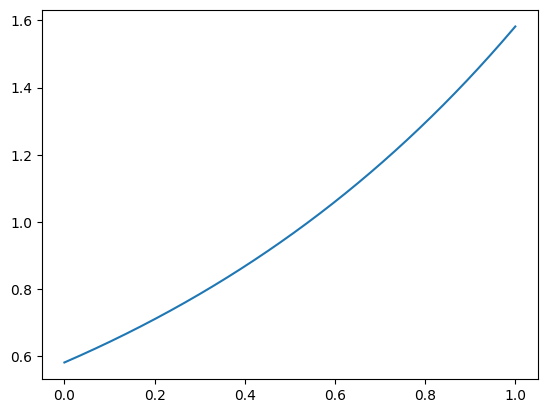

In [58]:
x = np.linspace(0,1,1000)
plt.plot(x,f(x))

## Transformada e Histograma

Funcion Acumulativa Inversa:

$F^{-1}(u) = ln(1 + (e-1)u)$

In [43]:
def TF(n):
  x = [] #En este arreglo estara la muestra generada
  for i in range(n): #Se iterara entre 1 y n para llenar el arreglo x con los elementos de la muestra
    u = rnd.uniform(0,1) #Genera un numero distribucion uniforme entre 0 y 1
    x.append(np.log(1 + (np.e-1)*u)) #Evalua el numero obtenido en la funcion y lo añade al arreglo
  return x

Obtenemos la funcion de distribucion acumulativa, usando el truco visto en clase.

In [47]:
def cdf(x):
    n = len(x)
    y = np.sort(x)
    g = np.arange(n)/n
    return y,g

Generamos una muestra de 100000 numeros con distribucion $U(0,1)$, de tal manera que se logre una mejor precision de aproximacion y se note en el histograma que logramos la distribucion buscada.

In [48]:
n = 100000

In [49]:
x1 = TF(n)

Generando histograma:

(array([ 611.,  619.,  590.,  610.,  587.,  628.,  666.,  629.,  613.,
         654.,  633.,  627.,  656.,  724.,  676.,  699.,  680.,  710.,
         671.,  702.,  725.,  725.,  723.,  739.,  732.,  749.,  770.,
         770.,  817.,  783.,  791.,  756.,  809.,  789.,  834.,  809.,
         836.,  828.,  808.,  865.,  811.,  870.,  878.,  891.,  959.,
         952.,  967.,  905.,  977.,  935.,  939.,  968.,  962.,  924.,
        1046., 1021., 1100., 1066., 1005., 1062., 1058., 1086., 1071.,
        1071., 1123., 1167., 1128., 1121., 1146., 1155., 1171., 1184.,
        1189., 1235., 1280., 1247., 1239., 1268., 1300., 1257., 1331.,
        1364., 1288., 1316., 1340., 1370., 1413., 1371., 1365., 1445.,
        1384., 1429., 1461., 1459., 1490., 1523., 1565., 1550., 1551.,
        1608.]),
 array([2.51405856e-05, 1.00248865e-02, 2.00246324e-02, 3.00243783e-02,
        4.00241242e-02, 5.00238701e-02, 6.00236160e-02, 7.00233619e-02,
        8.00231078e-02, 9.00228537e-02, 1.00022600e-01, 1.

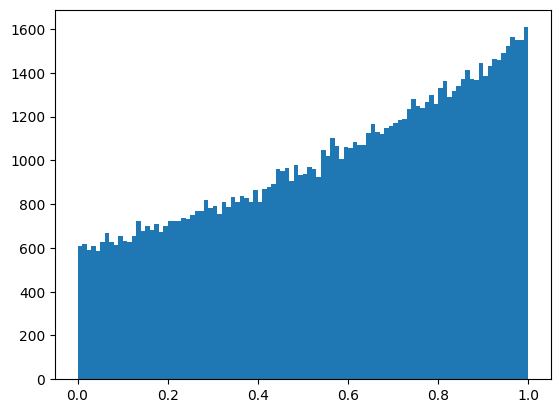

In [50]:
plt.hist(x1, bins=100) #bins = 100 para una mejor precision

Como podemos ver, el histograma de la muestra nos da un comportamiento demasiado similar al de la funcion objetivo, con lo que concluimos que el metodo funciono.

## Grafica de Funcion Acumulativa

Generando grafica de funcion acumulativa con la funcion antes mencionada.

In [51]:
y,g = cdf(x1)

La funcion de distribucion acumulativa es:

$F(x) = \frac{e^x - 1}{e - 1}$

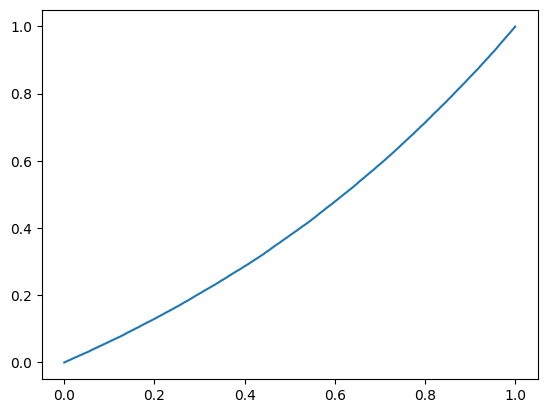

In [52]:
plt.step(y,g)